## Problem Statement

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [2]:
# load dataset
data = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
data['affair'] = (data.affairs > 0).astype(int)

In [4]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
# List of columns
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [6]:
# Shape of datset
data.shape

(6366, 10)

In [7]:
# checking the describe function for numerical columns
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [8]:
# Checkign the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
affair             6366 non-null int32
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [9]:
# Checking null values
data.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [ ]:
# 1. From above we can conclude that there are no null values in the dataset
# 2. All columns are float type

Text(0,0.5,'Freq')

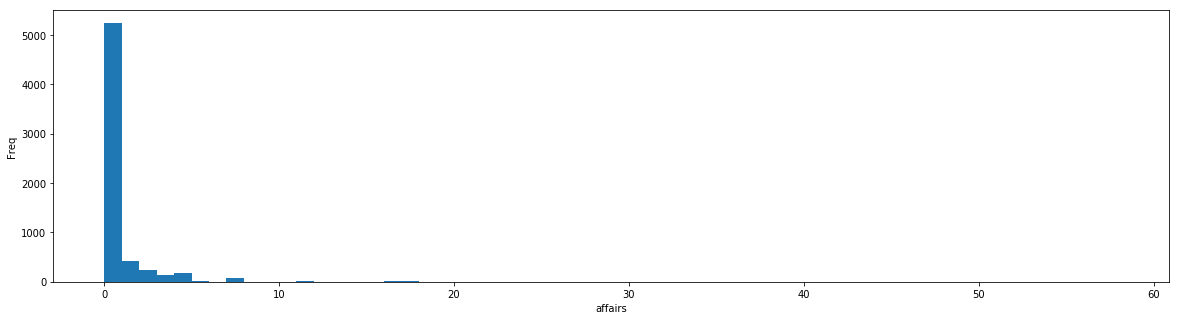

In [10]:
# Plot the affairs column of dataset
maxval=int(data.affairs.max()+1)
minval=int(data.affairs.min())
plt.figure(figsize=(20,5))
plt.hist(data.affairs,bins=maxval,range=(minval,maxval))
plt.xlabel('affairs')
plt.ylabel('Freq')

In [11]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [12]:
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Text(0,0.5,'Frequency')

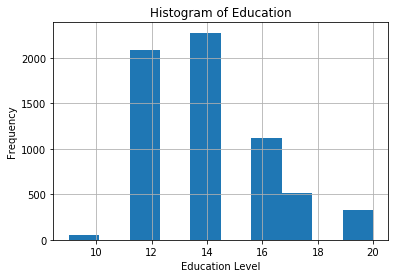

In [13]:
# histogram of education
data.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

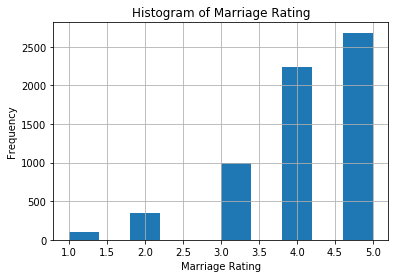

In [14]:
# histogram of marriage rating# hi 
data.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

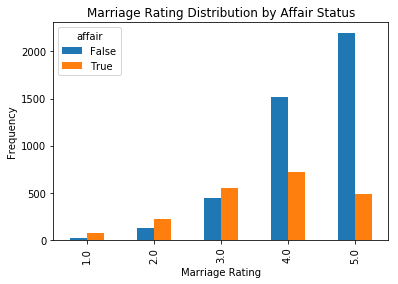

In [15]:

# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(data.rate_marriage, data.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Percentage')

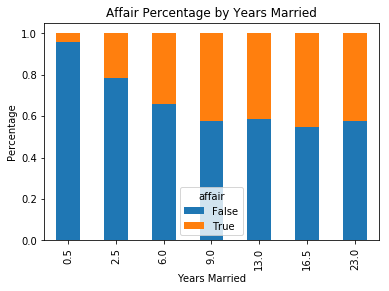

In [16]:
affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

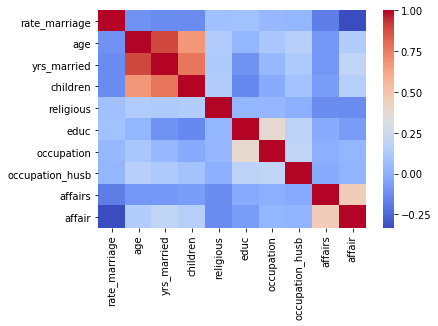

In [17]:
## Correlation plot:

sns.heatmap(data.corr(),cmap='coolwarm')

In [18]:
# create dataframes with an intercept column and dummy variables for# cre 
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  data, return_type="dataframe")
print (X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [19]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [20]:
# flatten y into a 1-D array
y = np.ravel(y)

In [21]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7258875274897895

In [22]:
# what percentage had affairs?
y.mean()

0.3224945020420987

In [23]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
# predict class labels for the test set
predicted = model2model2.predict(X_test)
print(predicted)

[1. 0. 0. ... 0. 0. 0.]


In [26]:
probs = model2.predict_proba(X_test)
print(probs)

[[0.3514634  0.6485366 ]
 [0.90955084 0.09044916]
 [0.72567333 0.27432667]
 ...
 [0.55727385 0.44272615]
 [0.81207043 0.18792957]
 [0.74734601 0.25265399]]


In [30]:
# generate evaluation metrics
print (accuracy_score(y_test, predicted))
print (roc_auc_score(y_test, predicted))

0.7324607329842932
0.6358365753343255


In [34]:
print (confusion_matrix(y_test, predicted))
print (classification_report(y_test, predicted))

[[1174  129]
 [ 382  225]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.64      0.37      0.47       607

avg / total       0.72      0.73      0.71      1910



In [37]:

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


In [38]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.489835891324933]
1,occ_2,[0.18806639024440983]
2,occ_3,[0.4989478668156914]
3,occ_4,[0.25066856498524825]
4,occ_5,[0.8390080648117001]
5,occ_6,[0.8339084337443315]
6,occ_husb_2,[0.1906359445867889]
7,occ_husb_3,[0.2978327129263421]
8,occ_husb_4,[0.1614088540760616]
9,occ_husb_5,[0.18777091388972483]


In [39]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]]))

array([[0.77472221, 0.22527779]])

## Plotting the ROC curve

In [42]:
# fpr=false positve rate, tpr=true positive rate
fpr, tpr,_=roc_curve(model2.predict(X_test),y_test,drop_intermediate=False)

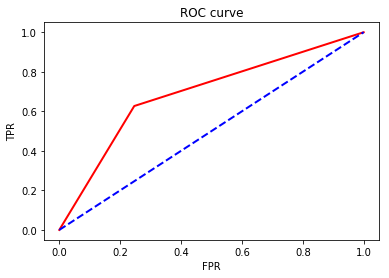

In [43]:
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
#Predicting the prob of an affair
#19 year old graduate, 3 years of marriage, not religious, rates her marriage as fair, husband is a farmer

In [44]:
model2.predict_proba(np.array([[1,0,0,1,0,0,1,0,0,0,0,3,19,3,0,1,14]]))

array([[0.44292229, 0.55707771]])